# Logistic regression model , Decision tree model , Random forest model and Plotting ROC curves 

In [1]:
#Importing the libraries

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from matplotlib import style
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')

In [2]:
#Importing the data

hr_data = pd.read_csv(r'C:\Users\ASUS\Downloads\WA_Fn-UseC_-HR-Employee-Attrition.csv')
hr_data.head()

,Age,Attrition,BusinessTravel,DailyRate,Department,DistanceFromHome,Education,EducationField,EmployeeCount,EmployeeNumber,...,RelationshipSatisfaction,StandardHours,StockOptionLevel,TotalWorkingYears,TrainingTimesLastYear,WorkLifeBalance,YearsAtCompany,YearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager
0,41,Yes,Travel_Rarely,1102,Sales,1,2,Life Sciences,1,1,...,1,80,0,8,0,1,6,4,0,5
1,49,No,Travel_Frequently,279,Research & Development,8,1,Life Sciences,1,2,...,4,80,1,10,3,3,10,7,1,7
2,37,Yes,Travel_Rarely,1373,Research & Development,2,2,Other,1,4,...,2,80,0,7,3,3,0,0,0,0
3,33,No,Travel_Frequently,1392,Research & Development,3,4,Life Sciences,1,5,...,3,80,0,8,3,3,8,7,3,0
4,27,No,Travel_Rarely,591,Research & Development,2,1,Medical,1,7,...,4,80,1,6,3,3,2,2,2,2


In [3]:
# Data Cleaning 
# Exploratory Data Analysis (EDA)

print(hr_data.info())
print(hr_data.isnull().sum())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1470 entries, 0 to 1469
Data columns (total 35 columns):
 #   Column                    Non-Null Count  Dtype 
---  ------                    --------------  ----- 
 0   Age                       1470 non-null   int64 
 1   Attrition                 1470 non-null   object
 2   BusinessTravel            1470 non-null   object
 3   DailyRate                 1470 non-null   int64 
 4   Department                1470 non-null   object
 5   DistanceFromHome          1470 non-null   int64 
 6   Education                 1470 non-null   int64 
 7   EducationField            1470 non-null   object
 8   EmployeeCount             1470 non-null   int64 
 9   EmployeeNumber            1470 non-null   int64 
 10  EnvironmentSatisfaction   1470 non-null   int64 
 11  Gender                    1470 non-null   object
 12  HourlyRate                1470 non-null   int64 
 13  JobInvolvement            1470 non-null   int64 
 14  JobLevel                

In [4]:
# we will change the datatype of our target variable column (change from object to category)
hr_data['Attrition'] = hr_data['Attrition'].astype('category')


In [5]:
hr_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1470 entries, 0 to 1469
Data columns (total 35 columns):
 #   Column                    Non-Null Count  Dtype   
---  ------                    --------------  -----   
 0   Age                       1470 non-null   int64   
 1   Attrition                 1470 non-null   category
 2   BusinessTravel            1470 non-null   object  
 3   DailyRate                 1470 non-null   int64   
 4   Department                1470 non-null   object  
 5   DistanceFromHome          1470 non-null   int64   
 6   Education                 1470 non-null   int64   
 7   EducationField            1470 non-null   object  
 8   EmployeeCount             1470 non-null   int64   
 9   EmployeeNumber            1470 non-null   int64   
 10  EnvironmentSatisfaction   1470 non-null   int64   
 11  Gender                    1470 non-null   object  
 12  HourlyRate                1470 non-null   int64   
 13  JobInvolvement            1470 non-null   int64 

In [6]:
# Dummy Variables: Concept by which we can convert our non-numerical columns into a numerical column.
# If your categorical column has N unique values, we can still live with N-1 columns.

cat_col = ['BusinessTravel','Department','EducationField','Gender','MaritalStatus','OverTime','JobRole']

hr_final = pd.get_dummies(hr_data, columns=cat_col, drop_first=True)

hr_final.head()

,Age,Attrition,DailyRate,DistanceFromHome,Education,EmployeeCount,EmployeeNumber,EnvironmentSatisfaction,HourlyRate,JobInvolvement,...,MaritalStatus_Single,OverTime_Yes,JobRole_Human Resources,JobRole_Laboratory Technician,JobRole_Manager,JobRole_Manufacturing Director,JobRole_Research Director,JobRole_Research Scientist,JobRole_Sales Executive,JobRole_Sales Representative
0,41,Yes,1102,1,2,1,1,2,94,3,...,1,1,0,0,0,0,0,0,1,0
1,49,No,279,8,1,1,2,3,61,2,...,0,0,0,0,0,0,0,1,0,0
2,37,Yes,1373,2,2,1,4,4,92,2,...,1,1,0,1,0,0,0,0,0,0
3,33,No,1392,3,4,1,5,4,56,3,...,0,1,0,0,0,0,0,1,0,0
4,27,No,591,2,1,1,7,1,40,3,...,0,0,0,1,0,0,0,0,0,0


In [7]:
# For the Attrition Column let us convert this into numerical form by using LabelEncoder

from sklearn.preprocessing import LabelEncoder
le= LabelEncoder()
hr_final['Attrition'] = le.fit_transform(hr_final['Attrition'])
hr_final

,Age,Attrition,DailyRate,DistanceFromHome,Education,EmployeeCount,EmployeeNumber,EnvironmentSatisfaction,HourlyRate,JobInvolvement,...,MaritalStatus_Single,OverTime_Yes,JobRole_Human Resources,JobRole_Laboratory Technician,JobRole_Manager,JobRole_Manufacturing Director,JobRole_Research Director,JobRole_Research Scientist,JobRole_Sales Executive,JobRole_Sales Representative
0,41,1,1102,1,2,1,1,2,94,3,...,1,1,0,0,0,0,0,0,1,0
1,49,0,279,8,1,1,2,3,61,2,...,0,0,0,0,0,0,0,1,0,0
2,37,1,1373,2,2,1,4,4,92,2,...,1,1,0,1,0,0,0,0,0,0
3,33,0,1392,3,4,1,5,4,56,3,...,0,1,0,0,0,0,0,1,0,0
4,27,0,591,2,1,1,7,1,40,3,...,0,0,0,1,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1465,36,0,884,23,2,1,2061,3,41,4,...,0,0,0,1,0,0,0,0,0,0
1466,39,0,613,6,1,1,2062,4,42,2,...,0,0,0,0,0,0,0,0,0,0
1467,27,0,155,4,3,1,2064,2,87,4,...,0,1,0,0,0,1,0,0,0,0
1468,49,0,1023,2,3,1,2065,4,63,2,...,0,0,0,0,0,0,0,0,1,0


In [8]:
# Summary Statistics of DataSet
hr_data.describe()

,Age,DailyRate,DistanceFromHome,Education,EmployeeCount,EmployeeNumber,EnvironmentSatisfaction,HourlyRate,JobInvolvement,JobLevel,...,RelationshipSatisfaction,StandardHours,StockOptionLevel,TotalWorkingYears,TrainingTimesLastYear,WorkLifeBalance,YearsAtCompany,YearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager
count,1470.000000,1470.000000,1470.000000,1470.000000,1470.0,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000,...,1470.000000,1470.0,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000
mean,36.923810,802.485714,9.192517,2.912925,1.0,1024.865306,2.721769,65.891156,2.729932,2.063946,...,2.712245,80.0,0.793878,11.279592,2.799320,2.761224,7.008163,4.229252,2.187755,4.123129
std,9.135373,403.509100,8.106864,1.024165,0.0,602.024335,1.093082,20.329428,0.711561,1.106940,...,1.081209,0.0,0.852077,7.780782,1.289271,0.706476,6.126525,3.623137,3.222430,3.568136
min,18.000000,102.000000,1.000000,1.000000,1.0,1.000000,1.000000,30.000000,1.000000,1.000000,...,1.000000,80.0,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000
25%,30.000000,465.000000,2.000000,2.000000,1.0,491.250000,2.000000,48.000000,2.000000,1.000000,...,2.000000,80.0,0.000000,6.000000,2.000000,2.000000,3.000000,2.000000,0.000000,2.000000
50%,36.000000,802.000000,7.000000,3.000000,1.0,1020.500000,3.000000,66.000000,3.000000,2.000000,...,3.000000,80.0,1.000000,10.000000,3.000000,3.000000,5.000000,3.000000,1.000000,3.000000
75%,43.000000,1157.000000,14.000000,4.000000,1.0,1555.750000,4.000000,83.750000,3.000000,3.000000,...,4.000000,80.0,1.000000,15.000000,3.000000,3.000000,9.000000,7.000000,3.000000,7.000000
max,60.000000,1499.000000,29.000000,5.000000,1.0,2068.000000,4.000000,100.000000,4.000000,5.000000,...,4.000000,80.0,3.000000,40.000000,6.000000,4.000000,40.000000,18.000000,15.000000,17.000000


In [11]:
# Have to standardize (transform) our data: Because there are few columns which has a high range.
# we need to scale our data. 
from sklearn.preprocessing import StandardScaler
sc = StandardScaler()
X_scal = sc.fit_transform(X)

In [12]:
X

,Age,DailyRate,DistanceFromHome,Education,EmployeeCount,EmployeeNumber,EnvironmentSatisfaction,HourlyRate,JobInvolvement,JobLevel,...,MaritalStatus_Single,OverTime_Yes,JobRole_Human Resources,JobRole_Laboratory Technician,JobRole_Manager,JobRole_Manufacturing Director,JobRole_Research Director,JobRole_Research Scientist,JobRole_Sales Executive,JobRole_Sales Representative
0,41,1102,1,2,1,1,2,94,3,2,...,1,1,0,0,0,0,0,0,1,0
1,49,279,8,1,1,2,3,61,2,2,...,0,0,0,0,0,0,0,1,0,0
2,37,1373,2,2,1,4,4,92,2,1,...,1,1,0,1,0,0,0,0,0,0
3,33,1392,3,4,1,5,4,56,3,1,...,0,1,0,0,0,0,0,1,0,0
4,27,591,2,1,1,7,1,40,3,1,...,0,0,0,1,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1465,36,884,23,2,1,2061,3,41,4,2,...,0,0,0,1,0,0,0,0,0,0
1466,39,613,6,1,1,2062,4,42,2,3,...,0,0,0,0,0,0,0,0,0,0
1467,27,155,4,3,1,2064,2,87,4,2,...,0,1,0,0,0,1,0,0,0,0
1468,49,1023,2,3,1,2065,4,63,2,2,...,0,0,0,0,0,0,0,0,1,0


In [9]:
# Building our model:
Y = hr_final[['Attrition']]

X = hr_final.drop(columns=['Attrition','Over18'])

In [10]:
# SPlit the data into train and test
from sklearn.model_selection import train_test_split

X_train, X_test, Y_train, Y_test = train_test_split(X,Y, test_size=0.8, random_state=555)

len(X_train), len(X_test), len(Y_train), len(Y_test)

(294, 1176, 294, 1176)

# Building Logistic Regression Model

In [13]:
# Create the model using training dataset

# Create our model object
from sklearn.linear_model import LogisticRegression

LR = LogisticRegression()

# fit the object on training data

model = LR.fit(X_train,Y_train)
model
print( 'the model has run successfuly')

the model has run successfuly


In [14]:
# Predicting the values on test data using your model

Y_test['Attrition Predicted'] = model.predict(X_test)

In [15]:
Y_test

,Attrition,Attrition Predicted
441,0,0
1117,0,0
936,0,0
223,0,0
1171,1,0
...,...,...
902,0,0
861,0,0
874,0,0
274,0,0


In [16]:
hr_final['Attrition'].value_counts()

0    1233
1     237
Name: Attrition, dtype: int64

In [17]:
# there is imbalance in Attrition so balancing it by using SMOTE.
#install imblearn
!pip install imblearn

Defaulting to user installation because normal site-packages is not writeable


In [18]:
from imblearn.over_sampling import SMOTE

In [19]:
# LETS BLANACE X_TRAIN & Y_TRAIN
sm = SMOTE(random_state=555)

X_train_new, Y_train_new = sm.fit_resample(X_train,Y_train)

In [20]:
print(sum(Y_train_new['Attrition']== 0))
print(sum(Y_train_new['Attrition']== 1))

248
248


In [21]:
from sklearn.linear_model import LogisticRegression

LR_smote = LogisticRegression()

# fit the object on training data

model_smote = LR_smote.fit(X_train_new,Y_train_new)
model_smote
print('The model run successfuly')

The model run successfuly


In [22]:
Y_test['Pred_Attrition_smote']= model_smote.predict(X_test)
Y_test

,Attrition,Attrition Predicted,Pred_Attrition_smote
441,0,0,0
1117,0,0,0
936,0,0,0
223,0,0,0
1171,1,0,0
...,...,...,...
902,0,0,1
861,0,0,0
874,0,0,1
274,0,0,1


In [23]:
Y_test_pd= model_smote.predict(X_test)
Y_test_pd

array([0, 0, 0, ..., 1, 1, 1])

In [24]:
Y_test

,Attrition,Attrition Predicted,Pred_Attrition_smote
441,0,0,0
1117,0,0,0
936,0,0,0
223,0,0,0
1171,1,0,0
...,...,...,...
902,0,0,1
861,0,0,0
874,0,0,1
274,0,0,1


In [25]:
from sklearn.metrics import roc_auc_score
from sklearn.metrics import roc_curve
Log_ROC_auc = roc_auc_score(Y_test['Attrition'],model_smote.predict(X_test))
fpr, tpr, threshold=roc_curve(Y_test['Attrition'],model_smote.predict(X_test))


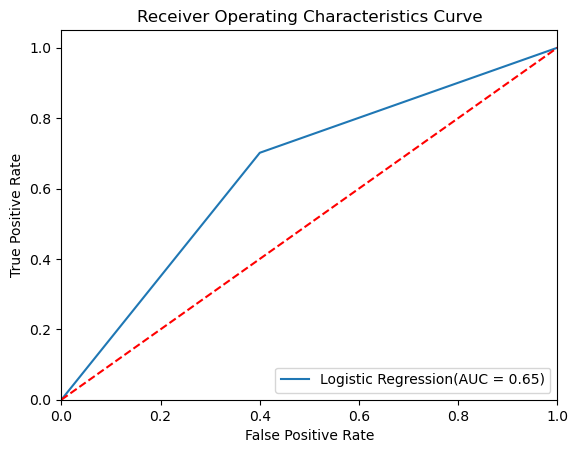

In [26]:
plt.figure()
plt.plot(fpr ,tpr, label="Logistic Regression(AUC = %0.2f)" % Log_ROC_auc)
plt.plot([0,1], [0,1], 'r--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristics Curve')
plt.legend(loc="lower right")
plt.savefig('Log_ROC')
plt.show()

The more that the ROC curve hugs the top left corner of the plot, the better the model does at classifying the data into categories.

-To quantify this, we can calculate the AUC (area under the curve) which tells us how much of the plot is located under the    curve.

-After calculating the AUC, Logistic Regression model have 0.66% of the plot located under the curve.

-The closer AUC is to 1, the better the model.

## Building Desicion tree model

In [27]:
from sklearn.tree import DecisionTreeClassifier

dt = DecisionTreeClassifier()

# fitting the object on training data

In [28]:
model_dt = dt.fit(X_train_new,Y_train_new)
model_dt
print('The model run successfuly')

The model run successfuly


In [29]:
Y_test['Pred_Attrition_smote_dt']= model_dt.predict(X_test)
Y_test

,Attrition,Attrition Predicted,Pred_Attrition_smote,Pred_Attrition_smote_dt
441,0,0,0,0
1117,0,0,0,0
936,0,0,0,0
223,0,0,0,0
1171,1,0,0,0
...,...,...,...,...
902,0,0,1,0
861,0,0,0,1
874,0,0,1,1
274,0,0,1,1


In [30]:
Y_test.drop(columns=['Attrition Predicted','Pred_Attrition_smote'])

,Attrition,Pred_Attrition_smote_dt
441,0,0
1117,0,0
936,0,0
223,0,0
1171,1,0
...,...,...
902,0,0
861,0,1
874,0,1
274,0,1


In [31]:
Y_test_pd_dt= model_dt.predict(X_test)
Y_test_pd_dt

array([0, 0, 0, ..., 1, 1, 0])

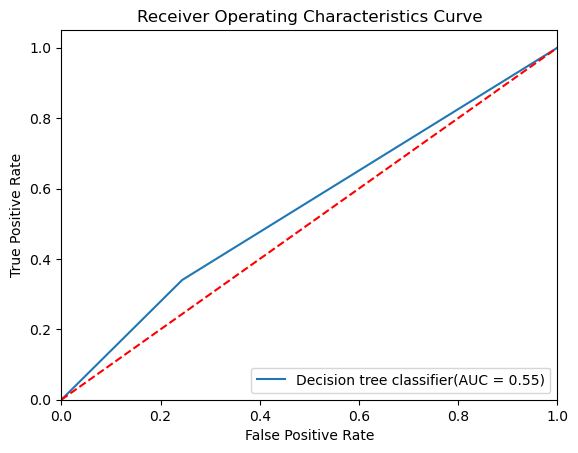

In [32]:
# Plotting ROC

Log_ROC_auc = roc_auc_score(Y_test['Attrition'],model_dt.predict(X_test))
fpr, tpr, threshold=roc_curve(Y_test['Attrition'],model_dt.predict(X_test))
                              
plt.figure()
plt.plot(fpr ,tpr, label="Decision tree classifier(AUC = %0.2f)" % Log_ROC_auc)
plt.plot([0,1], [0,1], 'r--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristics Curve')
plt.legend(loc="lower right")
plt.savefig('Log_ROC')
plt.show()                              

The more that the ROC curve hugs the top left corner of the plot, the better the model does at classifying the data into categories.

-To quantify this, we can calculate the AUC (area under the curve) which tells us how much of the plot is located under the curve.

-After calculating the AUC, Decision tree classifier model have 0.58% of the plot located under the curve.

-The closer AUC is to 1, the better the model.

# Building Random forest model

In [33]:
from sklearn.ensemble import RandomForestClassifier

rf = RandomForestClassifier(n_estimators=500)

#Fit the object on training data

model_rf = rf.fit(X_train_new, Y_train_new)
model_rf
print('The model has run successfuly')

The model has run successfuly


In [34]:
Y_test['Pred_Attrition_smote_rf']= model_rf.predict(X_test)
Y_test

,Attrition,Attrition Predicted,Pred_Attrition_smote,Pred_Attrition_smote_dt,Pred_Attrition_smote_rf
441,0,0,0,0,0
1117,0,0,0,0,0
936,0,0,0,0,0
223,0,0,0,0,0
1171,1,0,0,0,0
...,...,...,...,...,...
902,0,0,1,0,0
861,0,0,0,1,0
874,0,0,1,1,0
274,0,0,1,1,1


In [35]:
Y_test.drop(columns=['Attrition Predicted','Pred_Attrition_smote','Pred_Attrition_smote_dt'])

,Attrition,Pred_Attrition_smote_rf
441,0,0
1117,0,0
936,0,0
223,0,0
1171,1,0
...,...,...
902,0,0
861,0,0
874,0,0
274,0,1


In [36]:
Y_test_pd_rf= model_rf.predict(X_test)
Y_test_pd_rf

array([0, 0, 0, ..., 0, 1, 0])

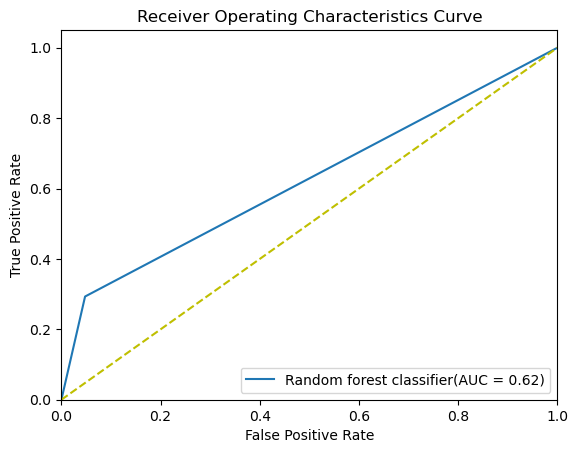

In [37]:
# Plotting ROC

Log_ROC_auc = roc_auc_score(Y_test['Attrition'],model_rf.predict(X_test))
fpr, tpr, threshold=roc_curve(Y_test['Attrition'],model_rf.predict(X_test))
                              
plt.figure()
plt.plot(fpr ,tpr, label="Random forest classifier(AUC = %0.2f)" % Log_ROC_auc)
plt.plot([0,1], [0,1], 'y--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristics Curve')
plt.legend(loc="lower right")
plt.savefig('Log_ROC')
plt.show() 

The more that the ROC curve hugs the top left corner of the plot, the better the model does at classifying the data into categories.

-To quantify this, we can calculate the AUC (area under the curve) which tells us how much of the plot is located under the curve.

-After calculating the AUC, Random forest classifier model have 0.63% of the plot located under the curve.

-The closer AUC is to 1, the better the model.